In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print(type(train_images), type(train_labels))

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

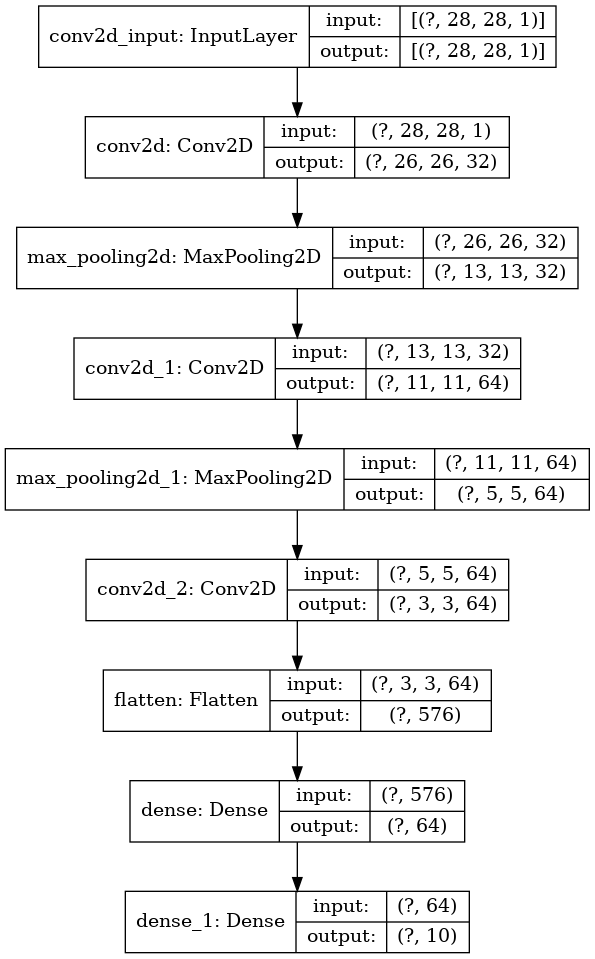

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1433
Epoch 2/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0463
Epoch 3/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0328
Epoch 4/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0243
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0197


In [7]:
model.evaluate(test_images,  test_labels)

10000/10000 [==============================] - 1s 90us/sample - loss: 0.0308


0.030760509621679376

In [17]:
model.predict(test_images[:1])

array([[9.0130958e-12, 6.9526696e-10, 2.8766611e-09, 4.6397304e-08,
        3.1468114e-10, 3.0302844e-10, 3.3262915e-16, 1.0000000e+00,
        1.1217556e-11, 1.5100955e-10]], dtype=float32)

In [18]:
model.predict_classes(test_images[:1])

array([7])

In [21]:
model.predict_generator(test_images[:1])

Instructions for updating:
Please use Model.predict, which supports generators.


array([[9.0130958e-12, 6.9526696e-10, 2.8766611e-09, 4.6397304e-08,
        3.1468114e-10, 3.0302844e-10, 3.3262915e-16, 1.0000000e+00,
        1.1217556e-11, 1.5100955e-10]], dtype=float32)